# Bachlier Example

Consider an underlying which follows the Bachlier (ABM) model

$$\begin{align*}
d\mathbf{S}_{t} &= \mathbf{L} d\mathbf{W}_{t}\\
\mathbf{S}_{t} &= \mathbf{S}_{0} + \mathbf{L}\mathbf{W}_{t}, \mathbf{S}_{0} = \mathbf{1}
\end{align*}$$

And there is some weight vector (corresponding to an index) $\mathbf{w}, \mathbf{X}_{t} = \mathbf{w}^{\top}\mathbf{S}_{t}$

Where $S_{t} \in \mathbb{R}^{d}, W_{t} \in \mathbb{R}^{f}, L \in \mathbb{R}^{d \times f}, \mathbf{w} \in \mathbb{R}^{d}$

The payoff of a basket option is given by:

$$(X_{T} - K)^{+} = (\mathbf{w}^{\top}\mathbf{S}_{t} - K)^{+}$$


We can write

$$\mathbf{w}^{\top}\mathbf{S}_{t} = \mathbf{w}^{\top}\mathbf{S}_{0} + (\mathbf{w}^{\top}\mathbf{L})\mathbf{W}_{t} \sim N(\mathbf{w}^{\top}S_{0}, \mathbf{w}^{\top}\mathbf{L}\mathbf{L}^{\top}\mathbf{w} T )$$



$$aZ + b - K \geq 0 \implies Z \geq \frac{K - b}{a}$$

$$(aZ  +b - K)1_{aZ  +b - K \geq 0} = a(Z + \frac{b - K}{a})1_{Z \geq (K - b)/a} = a(Z - d)1_{Z \geq d}$$


$$a(Z + \frac{b - K}{a}) \geq 0 \implies Z \geq \frac{K -b}{a}$$



$$\int_{y}^{\infty} z\frac{e^{-z^{2}/2}}{\sqrt{2\pi}} dz = [\frac{-1}{\sqrt{2\pi}} e^{-z^{2}/2}]_{y}^{\infty} = \frac{e^{-y^{2}/2}}{\sqrt{2\pi}}$$


$$\sigma \frac{1}{\sqrt{2\pi}}e^{\frac{-(K - b)^{2}}{2}} - (K - b)\Phi(-(\frac{K - b}{\sigma}))$$

We have the no arbitrage bound

$$\mathbb{E}[(X_{T} - K)^{+}] \geq \mathbb{E}[X_{T} - K] = (X_{t} - K)$$



$$dV(t, S_{t}) = \frac{\partial V}{\partial t}dt + \sum_{i = 1}^{d}\frac{\partial V}{\partial S_{i}}dS_{i, t} + \frac{1}{2} \frac{\partial V}{\partial S_{i}S_{j}}d[S_{i}, S_{j}] $$

In [14]:
from numpy.random import default_rng
import numpy as np
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

N_ASSETS = 10 ** 2
F = 10
N_SAMPLES = 10 ** 3
T = 1


rng = default_rng(42)
L = rng.standard_normal((N_ASSETS, F))
cov = (L @ L.T)

# Simulate St, ST
Wt = (np.sqrt(T) * rng.standard_normal((N_SAMPLES, F))) @ L.T
S0 = 1.0 + Wt
WT = (np.sqrt(T) * rng.standard_normal((N_SAMPLES, F))) @ L.T


# create random weights
w  = rng.uniform(low = 0, high = 1, size =(N_ASSETS)).reshape((-1, 1))
w /= w.sum()

print(S0.shape, WT.shape, w.shape)
display(S0)
display(WT)
display(w.T)

(1000, 100) (1000, 100) (100, 1)


array([[ 1.44504865,  2.02882851,  1.47684977, ...,  1.0268124 ,
         1.1993514 ,  0.95837086],
       [ 0.13004888, -0.51902647,  0.75256233, ...,  3.09451344,
        -4.5100117 , -0.78826978],
       [ 5.06727728,  0.6991696 ,  1.46016789, ...,  1.87603271,
         2.77163591,  2.60484378],
       ...,
       [ 0.98192607, -1.23098508,  2.49715948, ...,  4.12061186,
         5.84768958,  1.59760576],
       [ 0.92082609, -0.71518611,  1.37729194, ...,  0.52786381,
        -0.71358009,  1.17297144],
       [-4.08837532,  1.56905703, -0.86269395, ...,  1.0927825 ,
        -2.75753682,  4.18572939]])

array([[ 2.07370606,  0.72637777,  0.23355534, ...,  2.22753907,
         1.69064201, -0.09012022],
       [-5.85626648,  2.40590885, -1.38693082, ..., -3.13235944,
        -2.45805647,  0.40151683],
       [-0.5417257 ,  6.10897356, -0.01265209, ...,  0.74584728,
        -1.59424473,  4.14830738],
       ...,
       [-1.25929611, -0.29429731, -0.53516288, ..., -3.3106652 ,
         3.90032831, -0.74729497],
       [-5.59335751, -1.38533729,  0.3770709 , ..., -4.12153067,
        -1.09067806,  0.56748279],
       [ 2.16353313,  1.57312316, -1.95731099, ...,  1.7645844 ,
         3.46183633, -2.41905129]])

array([[0.00521446, 0.01113517, 0.01073193, 0.01529441, 0.01538252,
        0.00567736, 0.01762564, 0.01773769, 0.01886679, 0.00910557,
        0.0196462 , 0.01561707, 0.01299621, 0.00860047, 0.01676152,
        0.01520375, 0.01165062, 0.01983982, 0.00496343, 0.01276873,
        0.00638934, 0.00910953, 0.00674389, 0.00665651, 0.00749756,
        0.00112773, 0.0007931 , 0.01442349, 0.00618603, 0.0004221 ,
        0.0016212 , 0.00389674, 0.00095926, 0.01882512, 0.01130845,
        0.00783975, 0.01059917, 0.00224474, 0.01396435, 0.01929156,
        0.00259963, 0.00303622, 0.01250827, 0.00302289, 0.00250802,
        0.01334035, 0.01230918, 0.00433223, 0.01637847, 0.00209413,
        0.00661711, 0.01470096, 0.01221455, 0.01193938, 0.01365453,
        0.01286242, 0.01739502, 0.01131654, 0.0079842 , 0.01524258,
        0.00515799, 0.0151133 , 0.00557073, 0.00955795, 0.01470744,
        0.01248829, 0.00170492, 0.00888502, 0.01615317, 0.01983224,
        0.0092877 , 0.00170963, 0.00728585, 0.00

In [19]:
### Define payoff and pathwise derivative of payoff
@tf.function
def basket_payoff(S0, WT, w, K):
    XT = (S0 + WT) @ w
    return tf.math.maximum(XT - K, 0)

grads = None
with tf.GradientTape() as tape:
    S0 = tf.Variable(S0)
    payoffs = basket_payoff(S0, WT, w, 1)
    grads = tape.gradient(payoffs, S0)
    
grads / w.T

<tf.Tensor: shape=(1000, 100), dtype=float64, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])>

In [20]:
# MC Payoffs, Greeks
MCs = np.zeros((N_SAMPLES))
MC_grads = np.zeros((N_SAMPLES, N_ASSETS))
for i in tqdm(range(N_SAMPLES)):
    with tf.GradientTape() as tape:
        temp = tf.Variable(S0.numpy()[i, :])
        P = basket_payoff(temp, WT, w, 1)
        grad = tape.gradient(tf.math.reduce_mean(P), temp)
        MCs[i] = tf.math.reduce_mean(P).numpy()
        MC_grads[i, :] = tf.math.reduce_mean(grad, axis = 0).numpy()

100%|██████████████████████████████████████| 1000/1000 [00:06<00:00, 144.51it/s]


In [21]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model
from typing import Union, Callable
from tqdm import tqdm
import tensorflow_probability as tfp


def create_model(n_feats:int = 1, 
                 activation_func:Union[Callable, str] = 'elu',
                 kernel_init:Union[Callable,str] = 'glorot_normal',
                 n_layers:int = 1, 
                 N_UNITS:int = 100,
                SEED = 42):
    tf.random.set_seed(42)
    input_layer = Input(n_feats, name="input_layer")
    layers = [Dense(N_UNITS, 
                    activation=activation_func,
                    kernel_initializer = kernel_init
                   )(input_layer)]
    
    for i in range(1, n_layers):
        layers += [Dense(N_UNITS, 
                    activation=activation_func,
                    kernel_initializer = kernel_init
                   )(layers[-1])]
    output_layer = Dense(1, name="output_layer")(layers[-1])

    model = Model(input_layer, output_layer)
    return model

model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [22]:
no_grad_model = create_model(n_feats = N_ASSETS, N_UNITS = 30, n_layers = 3)
opt = tf.keras.optimizers.Adam(learning_rate = 1e-3)

grad_model = create_model(n_feats = N_ASSETS, N_UNITS = 30, n_layers = 3)
opt2 = tf.keras.optimizers.Adam(learning_rate = 1e-3)

np.allclose(no_grad_model(S0).numpy(), grad_model(S0).numpy())

True

In [24]:
# train model without gradient labels
no_grad_model.compile(optimizer=opt, loss='MSE')
no_grad_model.summary()
history = no_grad_model.fit(S0.numpy(), payoffs.numpy(), epochs=30, verbose=0)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 100)]             0         
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 output_layer (Dense)        (None, 1)                 31        
                                                                 
Total params: 4,921
Trainable params: 4,921
Non-trainable params: 0
_________________________________________________________________


In [665]:
# model = create_model(n_feats = 10, N_UNITS = 30, n_layers = 5)
# opt = tf.keras.optimizers.Adam(learning_rate = 1e-2)

# def custom_loss_pass(model, x_tensor):
#     def custom_loss(y_true,y_pred):
#         with tf.GradientTape() as t:
#             t.watch(x_tensor)
#             output = model(x_tensor)
#         grad = t.gradient(output, x_tensor)
#         # loss_data = tf.reduce_mean(tf.square(yTrue - yPred), axis=-1)
#         loss = tf.reduce_mean(tf.square(output - y_true[:, :1])) + l * tf.reduce_mean(tf.square(y_true[:, 1:] - grad))
#         return loss
#     return custom_loss


# model.compile(loss=custom_loss_pass(model, tf.convert_to_tensor(S0.numpy(), dtype=tf.float32)), optimizer=opt)
# model.fit(tf.convert_to_tensor(S0.numpy(), dtype=tf.float32), 
#           tf.convert_to_tensor(np.hstack([y.numpy(), grads]), dtype=tf.float32), batch_size=1024, epochs=100, shuffle=False)

In [666]:
payoffs.shape, S0.shape, grads.shape

In [26]:
dataset = tf.data.Dataset.from_tensor_slices((S0, payoffs, grads))
BATCH_SIZE = 128
l = 1
batched_dataset = dataset.batch(BATCH_SIZE)
losses = {"grad":[], "total":[], "pred":[]}

EPOCHS = 10
for epoch in tqdm(range(EPOCHS)):
    temp_grad = []
    temp_pred = []
    temp_total = []
    for (x_batch, y_batch, grads_batch) in batched_dataset:
        with tf.GradientTape() as loss_tape:
            
            with tf.GradientTape() as model_tape:
                loss_tape.watch(x_batch)
                output = grad_model(x_batch)                
            model_grads = model_tape.gradient(output, x_batch)
            
            pred_loss =  tf.reduce_mean(tf.keras.losses.MeanSquaredError()(output, y_batch))
            grad_loss =  tf.reduce_mean(tf.keras.losses.MeanSquaredError()(grads_batch, model_grads))
            total_loss = pred_loss + l * grad_loss
            
            loss_grad = loss_tape.gradient(total_loss, grad_model.trainable_variables)
            opt.apply_gradients(zip(loss_grad, grad_model.trainable_variables))
            
            temp_grad += [grad_loss.numpy()]
            temp_pred += [pred_loss.numpy()]
            temp_total+= [total_loss.numpy()]
            
    losses["grad"] += [np.mean(temp_grad)]
    losses["pred"] += [np.mean(temp_pred)]
    losses["total"] += [np.mean(temp_total)]

100%|███████████████████████████████████████████| 10/10 [00:03<00:00,  3.30it/s]


In [27]:
@tf.function
def analytic_val(S0, sigma, K):
    b = S0 @ w
    d = (K - b) / sigma
    dist = tfp.distributions.Normal(0.0, 1.0)
    analytic = sigma * ((tf.math.exp(-0.5 * d ** 2) / tf.math.sqrt(2 * np.pi)) -d * dist.cdf(-d))
    return analytic

true_grads = None
sigma = np.sqrt((w.T @ L @ L.T @ w)[0][0]).astype(np.float32)
K = 1
print(sigma)
with tf.GradientTape() as tape:
    S0_tensor = tf.Variable(S0.numpy(), dtype=tf.float32)
    analytic_prices = analytic_val(S0_tensor, sigma, 1.0)
    true_grads = tape.gradient(analytic_prices, S0_tensor)
    
analytic_prices = analytic_prices.numpy()

0.23464692


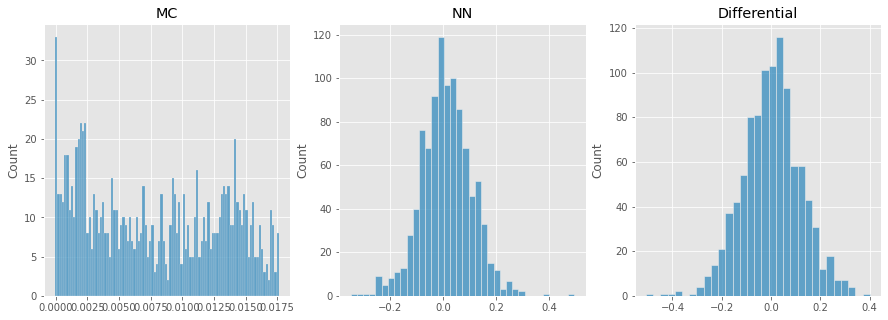

In [31]:
import seaborn as sns
plt.style.use("ggplot")
fig, ax = plt.subplots(ncols = 3, figsize=(15, 5))
sns.histplot(analytic_prices.reshape(-1) - MCs, bins=100, ax = ax[0])
sns.histplot(analytic_prices.reshape(-1) - no_grad_model.predict(S0.numpy()).reshape(-1), ax = ax[1])
sns.histplot(analytic_prices.reshape(-1) - grad_model.predict(S0.numpy()).reshape(-1), ax = ax[2])
ax[2].set_title("Differential");
ax[1].set_title("NN");
ax[0].set_title("MC");

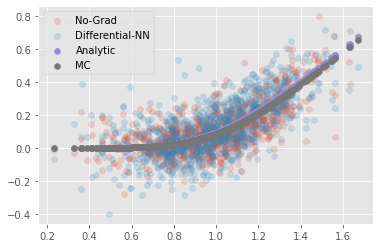

In [32]:
import matplotlib.pyplot as plt


b = S0 @ w
plt.scatter(b, no_grad_model.predict(S0.numpy()), label = "No-Grad", alpha=0.2)
plt.scatter(b, grad_model.predict(S0.numpy()), label = "Differential-NN", alpha=0.2)


plt.scatter(b, analytic_prices, label="Analytic")
plt.scatter(b, MCs, label = "MC")
plt.legend()

In [672]:
input_tensor = tf.Variable(S0)
with tf.GradientTape() as loss_tape:
    loss_tape.watch(input_tensor)
    output = grad_model(input_tensor)
    model_grads = loss_tape.gradient(output, input_tensor)
    
(model_grads / w.T).numpy().mean(axis = 1)

In [36]:
from scipy.stats import qmc
from scipy.stats import norm
sampler = qmc.LatinHypercube(d=F)
sample = sampler.random(n=N_SAMPLES)
Wt = np.sqrt(T) * norm.ppf(sample) @ L.T
S0 = 1.0 + Wt
sample2 = sampler.random(n=N_SAMPLES)
WT = np.sqrt(T) * norm.ppf(sample2) @ L.T

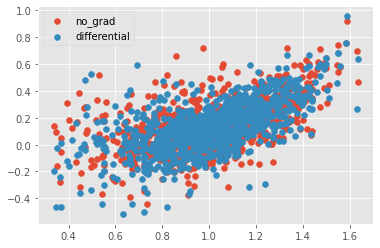

In [41]:
plt.scatter(S0 @ w, no_grad_model(S0), label="no_grad")
plt.scatter(S0 @ w, grad_model(S0), label="differential")
plt.legend()